# Práctica 2: Modelo cinemático inverso de un manipulador y planteamiento de trayectoria

## Objetivo

El objetivo de esta práctica es que el alumno comprenda, interprete y modifique la información básica de los formatos de Universal Robot Description File (URDF).


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno grafique y analice los resultados del modelo

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
| ------:| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>


| Elemento | Malo | Regular | Bueno |
| ------:| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Transformaciones homogéneas
Las transformaciones homogéneas permiten hacer el planteamiento del modelo cinemático de un robot, considerando las posiciones y orientaciones de las juntas del robot respecto al sistema de referencia de una junta anterior

Este planteamiento es el **modelo de cinemática directa**, que nos permite obtener la posición y velocidad del efector final de un manipulador en términos de los valores de la posición y velocidad de sus juntas (espacio de trabajo)

A través de este modelo se puede obtener el **modelo de cinemática inversa**, que permite obtener la velocidad de las juntas de un robot a partir de la velocidad deseada del efector final.

### Planteamiento de una trayectoria
Si se conoce el punto inicial y final de una trayectoria deseada, se pueden obtener los puntos intermedios de la trayectoria. La forma más fácil de realizar esta interpolación es a través de un spline. El orden del spline permitirá controlar las condiciones inicial y final de la posición, velocidad ó aceleración que tendrá el efector final durante el trayecto. 

Juntando la interpolación de la trayectoria y el modelo de la cinemática inversa, se pueden obtener todos los puntos intermedios de la trayectoria que deben seguir las juntas del robot para que el efector final siga una trayectoria.

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Que son las transformaciones homogéneas?
>Respuesta: Son matrices que combinan rotaciones y traslaciones en una sola representación para describir la posición y orientación de un cuerpo en el espacio.

- ¿Que nos permite obtener el modelo de cinemática directa de un manipulador?
>Respuesta: Nos permite conocer la posición y orientación del efector final a partir de los valores de las articulaciones del manipulador.

- ¿Que nos permite obtener el modelo de cinemática inversa de un manipulador?
>Respuesta: Nos permite calcular los valores de las articulaciones que se requieren para que el efector final alcance una posición y orientación deseadas.

- ¿De que formas se puede interpolar la trayectoria de un efector final entre dos puntos?
>Respuesta: Se puede interpolar mediante trayectorias lineales en el espacio cartesiano o mediante trayectorias articulares en el espacio de las juntas.


## Desarrollo

### 1. Planteamiento de la cinemática directa
En esta primera parte, se crearán las transformaciones homogéneas y el modelo de cinemática directa de un robot RRR, incluyendo la matriz del Jacobiano. Se recomienda usar **Sympy** para el planteamiento de las expresiones. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/p2_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [12]:
# Celda 1: Transformaciones homogéneas, cinemática directa y Jacobiano
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

dim = (0.3, 0.3, 0.3)
theta_0_1, theta_1_2, theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")

def trans_homo(x, y, z, gamma, beta, alpha):
    R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
    R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
    R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
    R = R_x * R_y *R_z
    p = Matrix([[x],[y],[z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
    return T

#Matrices de transformación
T_0_1 = trans_homo(0, 0, 0, pi/2, 0, theta_0_1)
T_1_2 = trans_homo(dim[0], 0, 0, 0, 0, theta_1_2)
T_2_3 = trans_homo(dim[1], 0, 0, 0, 0, theta_2_3)
T_3_P = trans_homo(dim[2], 0, 0, 0, 0, 0)
T_0_P = simplify(T_0_1 * T_1_2 * T_2_3 * T_3_P)
print("Matriz de transformación homogénea del efector final:")
print(T_0_P)

#Vector de postura xi = [x z th]
xi_0_P = Matrix([[T_0_P[0, 3]],
                 [T_0_P[2, 3]],
                 [theta_0_1 + theta_1_2 + theta_2_3]])
print("\nVector de postura (x, z, θ):")
print(xi_0_P)

# Jacobiano
J = Matrix.hstack(diff(xi_0_P, theta_0_1), 
                  diff(xi_0_P, theta_1_2), 
                  diff(xi_0_P, theta_2_3))
print("\nMatriz Jacobiana:")
print(J)

J_simplified = simplify(J)
print("\nJacobiano simplificado:")
print(J_simplified)

J_inv = J.inv()
print("\nInversa del Jacobiano:")
print(simplify(J_inv))

theta_test = [pi/4, pi/4, pi/4]
T_test = T_0_P.subs([(theta_0_1, theta_test[0]), (theta_1_2, theta_test[1]), (theta_2_3, theta_test[2])])
xi_test = xi_0_P.subs([(theta_0_1, theta_test[0]), (theta_1_2, theta_test[1]), (theta_2_3, theta_test[2])])
print(f"\nEjemplo para θ1={theta_test[0]}, θ2={theta_test[1]}, θ3={theta_test[2]}:")
print(f"Posición del efector: x={float(xi_test[0]):.3f}, z={float(xi_test[1]):.3f}")
print("Orientación del efector: θ={:.3f} rad = {:.1f}°".format(float(xi_test[2]), float(xi_test[2])*180/float(pi)))

Matriz de transformación homogénea del efector final:
Matrix([[cos(theta_0_1 + theta_1_2 + theta_2_3), -sin(theta_0_1 + theta_1_2 + theta_2_3), 0, 0.3*cos(theta_0_1) + 0.3*cos(theta_0_1 + theta_1_2) + 0.3*cos(theta_0_1 + theta_1_2 + theta_2_3)], [0, 0, -1, 0], [sin(theta_0_1 + theta_1_2 + theta_2_3), cos(theta_0_1 + theta_1_2 + theta_2_3), 0, 0.3*sin(theta_0_1) + 0.3*sin(theta_0_1 + theta_1_2) + 0.3*sin(theta_0_1 + theta_1_2 + theta_2_3)], [0, 0, 0, 1]])

Vector de postura (x, z, θ):
Matrix([[0.3*cos(theta_0_1) + 0.3*cos(theta_0_1 + theta_1_2) + 0.3*cos(theta_0_1 + theta_1_2 + theta_2_3)], [0.3*sin(theta_0_1) + 0.3*sin(theta_0_1 + theta_1_2) + 0.3*sin(theta_0_1 + theta_1_2 + theta_2_3)], [theta_0_1 + theta_1_2 + theta_2_3]])

Matriz Jacobiana:
Matrix([[-0.3*sin(theta_0_1) - 0.3*sin(theta_0_1 + theta_1_2) - 0.3*sin(theta_0_1 + theta_1_2 + theta_2_3), -0.3*sin(theta_0_1 + theta_1_2) - 0.3*sin(theta_0_1 + theta_1_2 + theta_2_3), -0.3*sin(theta_0_1 + theta_1_2 + theta_2_3)], [0.3*cos(theta

### 2. Planteamiento de la trayectoria

En esta segunda parte, se planteará el código que permita definir los puntos intermedios de una trayectoria, la cual debe tener velocidades y aceleraciones nulas al inicio y al final. Se deben incluir también las gráficas de la posición, velocidad y aceleración del efector final. 

Calcular la trayectoria considerando de forma general tiempo de duración, puntos inicial y final, y con una tasa de muestreo de 30 muestras por segundo. 

Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(3*t**5/16 - 15*t**4/16 + 5*t**3/4) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(3*t**5/16 - 15*t**4/16 + 5*t**3/4) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(3*t**5/16 - 15*t**4/16 + 5*t**3/4)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)], [-pi*(15*t**4/16 - 15*t**3/4 + 15*t**2/4)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(15*t**3/4 - 45*t**2/4 + 15*t/2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(15*t**3/4 - 45*t**2/4 + 15*t/2)], [-pi*(15*t**3/4 - 45*t**2/4 + 15*t/2)/8]])
Muestreando trayectoria
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
7

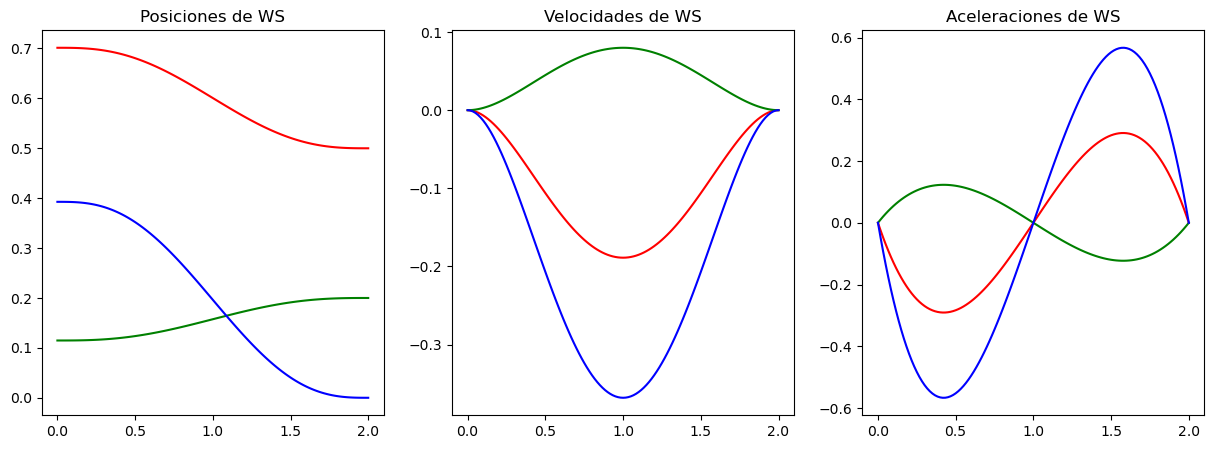

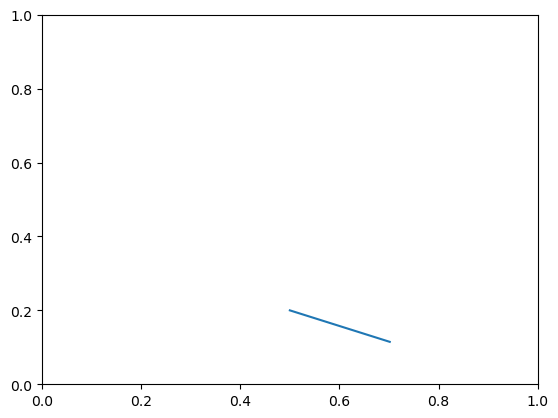

In [16]:
def generar_trayectoria(q_in = (pi/4, -pi/2, 3*pi/8), xi_fn = (0.5, 0.2, 0), tie = (0, 2), frec = 60):
    print("Creando trayectoria")
    
    #Variables para polinomio lambda
    t, a_0, a_1, a_2, a_3, a_4, a_5 = symbols("t a_0 a_1 a_2 a_3 a_4 a_5")
    
    #Polinomio lambda lam = a0 + a1t + a2t^2 + a3t^3 + a4t^4 + a5t^5
    lam = a_0 + a_1*t + a_2*t**2 + a_3*t**3 + a_4*t**4 + a_5*t**5
    
    #Primera y segunda derivada de lambda
    lam_dot = diff(lam, t)
    lam_dot_dot = diff(lam_dot, t)
    
    # Cálculo de parámetros de lambda. 
    # Planteando ecuaciones igualadas a cero
    # lam(t=ti) = 0
    # lam(t=tf) = 1   ==>  lam(t=tf) -1 = 0
    # lam'(t=ti) = 0
    # lam'(t=tf) = 0
    # lam''(t=ti) = 0
    # lam''(t=tf) = 0
    ec_1 = lam.subs(t, tie[0])
    ec_2 = lam.subs(t, tie[1]) - 1
    ec_3 = lam_dot.subs(t, tie[0])
    ec_4 = lam_dot.subs(t, tie[1])
    ec_5 = lam_dot_dot.subs(t, tie[0])
    ec_6 = lam_dot_dot.subs(t, tie[1])
    
    # Resolviendo sistema para las variables a0-a5
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6], [a_0, a_1, a_2, a_3, a_4, a_5], dict = True)
    
    # Tomando la primera solución devuelta y sustituyéndola en el polinomio
    lam_s = lam.subs(terminos[0])
    lam_dot_s = lam_dot.subs(terminos[0])
    lam_dot_dot_s = lam_dot_dot.subs(terminos[0])
    
    # Calculo de la posicion inicial del efector final a partir del vector de postura
    xi_in = xi_0_P.subs({
        theta_0_1: q_in[0],
        theta_1_2: q_in[1],
        theta_2_3: q_in[2]
    })
    
    # Posiciones de espacio de trabajo
    # xi = xi_in + lam(t) * (xi_fn - xi_in) 
    xi = xi_in + Matrix([
        [lam_s * (xi_fn[0] - xi_in[0])],
        [lam_s * (xi_fn[1] - xi_in[1])],
        [lam_s * (xi_fn[2] - xi_in[2])]
    ])
    
    # Velocidades de espacio de trabajo
    # xi' = lam'(t) * (xi_fn - xi_in)
    xi_dot = Matrix([
        [lam_dot_s * (xi_fn[0] - xi_in[0])],
        [lam_dot_s * (xi_fn[1] - xi_in[1])],
        [lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    
    # Aceleraciones de espacio de trabajo
    # xi'' = lam''(t) * (xi_fn - xi_in)
    xi_dot_dot = Matrix([
        [lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
        [lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
        [lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    
    print("Vector segunda derivada")
    print(xi)
    print(xi_dot)
    print(xi_dot_dot)
    
    # Muestreo del espacio de trabajo
    print("Muestreando trayectoria")
    # Número de muestras e incremento de tiempo
    muestras = int(frec * (tie[1] - tie[0]) + 1)
    dt = 1.0 / frec
    
    # Muestreo de tiempo entre tf y ti
    t_m = Matrix.zeros(1, muestras)
    t_m[0,0] = tie[0]
    for a in range(muestras - 1):
        t_m[0, a + 1] = t_m[0, a] + dt
    
    # Matrices vacías para guardar valores del espacio de trabajo
    # 3 filas, n columnas (cada columna es una posición/velocidad/aceleración del espacio de trabajo en un instante)
    xi_m = Matrix.zeros(3, muestras)
    xi_dot_m = Matrix.zeros(3, muestras)
    xi_dot_dot_m = Matrix.zeros(3, muestras)
    
    # Generando funciones para evitar usar lenguaje simbólico en las sustituciones
    xi_m_func = lambdify([t], xi)
    xi_dot_m_func = lambdify([t], xi_dot)
    xi_dot_dot_m_func = lambdify([t], xi_dot_dot)
    for a in range(muestras):
        """Así se sustituiría directo
        xi_m[:,a]          = xi.subs(t, t_m[0, a])
        xi_dot_m[:,a]      = xi_dot.subs(t, t_m[0, a])
        xi_dot_dot_m[:,a]  = xi_dot_dot.subs(t, t_m[0, a])"""
        xi_m[:, a] = xi_m_func(float(t_m[0, a]))
        xi_dot_m[:, a] = xi_dot_m_func(float(t_m[0, a]))
        xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(t_m[0, a]))
        print(a)
    
    #Agregando posición inicial como variable de la clase
    q_in = q_in
    
    return xi_m, xi_dot_m, xi_dot_dot_m, t_m

def graficar(xi_m, xi_dot_m, xi_dot_dot_m, t_m):
    fig, (xi_g, xi_dot_g, xi_dot_dot_g) = plt.subplots(nrows=1, ncols = 3, figsize=(15, 5))
    # Posiciones ws
    xi_g.set_title("Posiciones de WS")
    xi_g.plot(t_m.T, xi_m[0, :].T, color = "RED")
    xi_g.plot(t_m.T, xi_m[1, :].T, color = "GREEN")
    xi_g.plot(t_m.T, xi_m[2, :].T, color = "BLUE")

    # Velocidades ws
    xi_dot_g.set_title("Velocidades de WS")
    xi_dot_g.plot(t_m.T, xi_dot_m[0, :].T, color = "RED")
    xi_dot_g.plot(t_m.T, xi_dot_m[1, :].T, color = "GREEN")
    xi_dot_g.plot(t_m.T, xi_dot_m[2, :].T, color = "BLUE")

    # Aceleraciones ws
    xi_dot_dot_g.set_title("Aceleraciones de WS")
    xi_dot_dot_g.plot(t_m.T, xi_dot_dot_m[0, :].T, color = "RED")
    xi_dot_dot_g.plot(t_m.T, xi_dot_dot_m[1, :].T, color = "GREEN")
    xi_dot_dot_g.plot(t_m.T, xi_dot_dot_m[2, :].T, color = "BLUE")
    plt.show()

def graficar_ws(xi_m):
    plt.plot(xi_m[0, :].T, xi_m[1, :].T)
    plt.axis((0, 1, 0, 1))
    plt.show()

# Ejecución de la trayectoria con parámetros generales
xi_m, xi_dot_m, xi_dot_dot_m, t_m = generar_trayectoria()
graficar(xi_m, xi_dot_m, xi_dot_dot_m, t_m)
graficar_ws(xi_m)

### 3. Cinemática inversa
A partir del modelo de la cinemática directa, obtener la expresión e la cinemática inversa, que relacione las velocidades de las juntas del robot con la velocidad del efector final. Ya que el modelo de cinemática inversa sólo permite obtener velocidades, obtener también expresiones que permitan obtener la posición de las juntas y sus aceleraciones

In [17]:
# Colocar y correr el código dentro de estas celdas.
# Agregar cuantas consideren conveniente
print("Calculando cinematica inversa")
# Variables para los valores de las velocidades del ws
x_0_P_dot, z_0_P_dot, theta_0_P_dot = symbols(
"x_0_P_dot z_0_P_dot theta_0_P_dot")
# Derivada del vector de postura en términos de las velocidades del efector final
# xi' = [x' z' th'] 
xi_dot = Matrix([[x_0_P_dot], [z_0_P_dot], [theta_0_P_dot]])
print("Vector de velocidades del espacio de trabajo:")
print(xi_dot)

print("\nMatriz Jacobiana:")
print(J)

# Jacobiano
J_inv = J.inv()
print("\nInversa del Jacobiano:")
print(simplify(J_inv))

# De la primera derivada, despejamos q': 
# xi' = J * q'
# q' = J-1 * xi'
q_dot = J_inv * xi_dot
print("\nVelocidades de las juntas:")
print("q_dot = J_inv * xi_dot =")
print(simplify(q_dot))

theta_0_1_dot, theta_1_2_dot, theta_2_3_dot = symbols('theta_0_1_dot theta_1_2_dot theta_2_3_dot')

x_0_P_dot_dot, z_0_P_dot_dot, theta_0_P_dot_dot = symbols('x_0_P_dot_dot z_0_P_dot_dot theta_0_P_dot_dot')

# Crear una función a partir de la expresión simbólica
q_dot_func = lambdify([x_0_P_dot, z_0_P_dot, theta_0_P_dot, theta_0_1, theta_1_2, theta_2_3], q_dot)

Calculando cinematica inversa
Vector de velocidades del espacio de trabajo:
Matrix([[x_0_P_dot], [z_0_P_dot], [theta_0_P_dot]])

Matriz Jacobiana:
Matrix([[-0.3*sin(theta_0_1) - 0.3*sin(theta_0_1 + theta_1_2) - 0.3*sin(theta_0_1 + theta_1_2 + theta_2_3), -0.3*sin(theta_0_1 + theta_1_2) - 0.3*sin(theta_0_1 + theta_1_2 + theta_2_3), -0.3*sin(theta_0_1 + theta_1_2 + theta_2_3)], [0.3*cos(theta_0_1) + 0.3*cos(theta_0_1 + theta_1_2) + 0.3*cos(theta_0_1 + theta_1_2 + theta_2_3), 0.3*cos(theta_0_1 + theta_1_2) + 0.3*cos(theta_0_1 + theta_1_2 + theta_2_3), 0.3*cos(theta_0_1 + theta_1_2 + theta_2_3)], [1, 1, 1]])

Inversa del Jacobiano:
Matrix([[3.33333333333333*cos(theta_0_1 + theta_1_2)/sin(theta_1_2), 3.33333333333333*sin(theta_0_1 + theta_1_2)/sin(theta_1_2), 1.0*sin(theta_2_3)/sin(theta_1_2)], [-(3.33333333333333*cos(theta_0_1) + 3.33333333333333*cos(theta_0_1 + theta_1_2))/sin(theta_1_2), -(3.33333333333333*sin(theta_0_1) + 3.33333333333333*sin(theta_0_1 + theta_1_2))/sin(theta_1_2), -(1.

### 4. Aplicación de la cinemática inversa
Finalmente, a partir de los puntos de la trayectoria y el modelo de cinemática inversa, obtener las posiciones, velocidades y aceleraciones de las juntas del robot, así como sus gráficas en función del tiempo

Calculando cinematica inversa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(0.1875*t**5 - 0.9375*t**4 + 1.25*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(0.1875*t**5 - 0.9375*t**4 + 1.25*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(0.1875*t**5 - 0.9375*t**4 + 1.25*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(0.9375*t**4 - 3.75*t**3 + 3.75*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(0.9375*t**4 - 3.75*t**3 + 3.75*t**2)], [-pi*(0.9375*t**4 - 3.75*t**3 + 3.75*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(3.75*t**3 - 11.25*t**2 + 7.5*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(3.75*t**3 - 11.25*t**2 + 7.5*t)], [-pi*(3.75*t**3 - 11.25*t**2 + 7.5*t)/8]])
Muestreando trayectoria
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
6

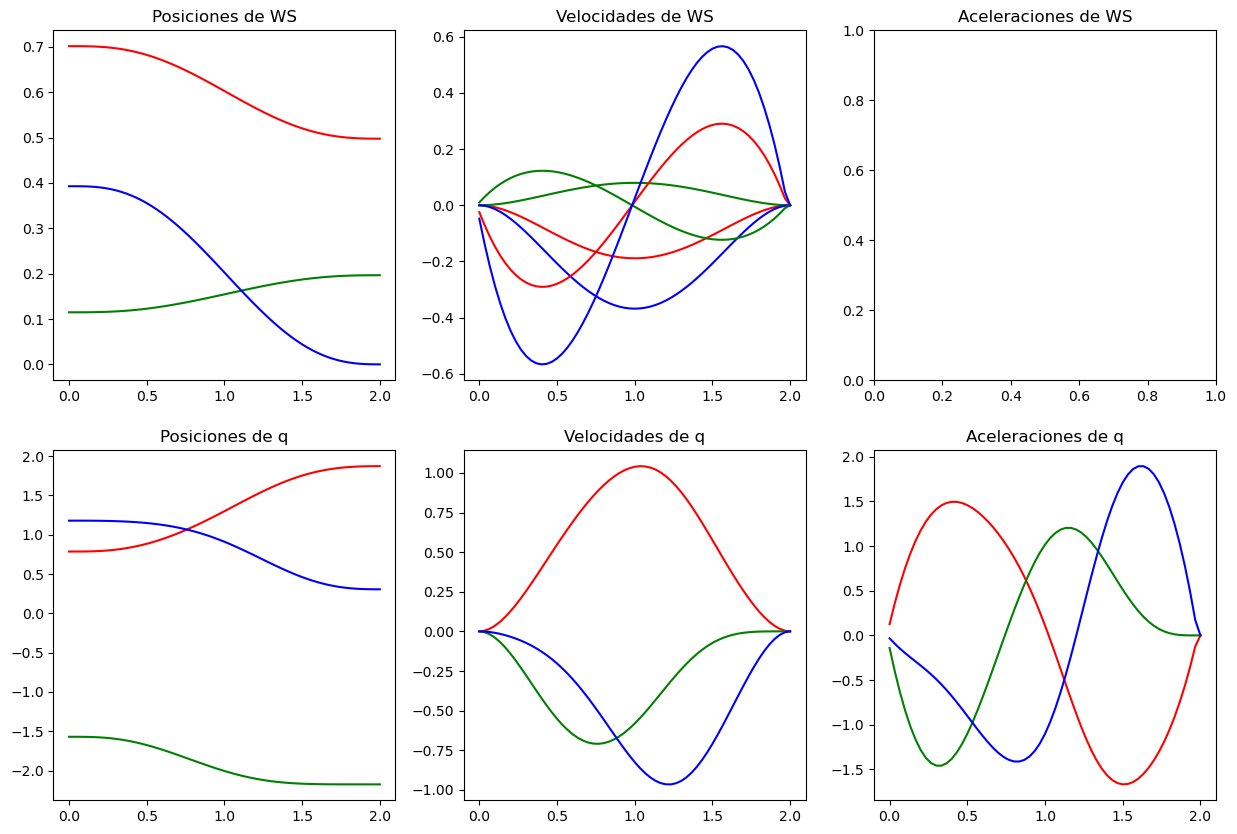

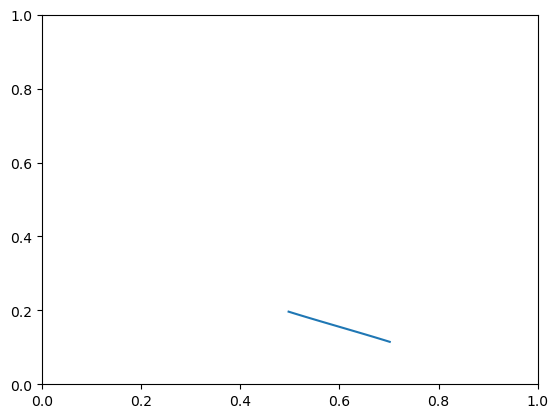

In [19]:
# Colocar y correr el código dentro de estas celdas. 
# Agregar cuantas consideren conveniente

print("Calculando cinematica inversa")

q_in = (pi/4, -pi/2, 3*pi/8)
xi_fn = (0.5, 0.2, 0)
tie = (0, 2.0)
frec = 30

# Obtener trayectoria del espacio de trabajo
xi_m_traj, xi_dot_m_traj, xi_dot_dot_m_traj, t_m_traj = generar_trayectoria(q_in, xi_fn, tie, frec)

# Número de muestras e incremento de tiempo
muestras = xi_m_traj.shape[1]
dt = 1.0 / frec

# Matrices vacías para los valores de espacio de las juntas
q_m = Matrix.zeros(3, muestras)
q_dot_m = Matrix.zeros(3, muestras)
q_dot_dot_m = Matrix.zeros(3, muestras)
# Agregando posición inicial (dato)
q_m[:, 0] = Matrix([[q_in[0]], [q_in[1]], [q_in[2]]])
# Agregando velocidad inicial
# q' = J-1 * xi' => Obtenemos velocidad de las juntas 
# en el punto actual sustituyendo velocidad actual del efector y 
# posición actual de las juntas
"""Así se sustituiría directo
q_dot_m[:,0] = q_dot.subs({
x_0_P_dot:     xi_dot_m[0, 0],
z_0_P_dot:     xi_dot_m[1, 0],
theta_O_P_dot: xi_dot_m[2, 0],
theta_O_1:     q_m[0, 0],
theta_1_2:     q_m[1, 0],
theta_2_3:     q_m[2, 0]})"""

q_dot_m[:, 0] = q_dot_func(
    float(xi_dot_m_traj[0, 0]),
    float(xi_dot_m_traj[1, 0]),
    float(xi_dot_m_traj[2, 0]),
    float(q_m[0, 0]),
    float(q_m[1, 0]),
    float(q_m[2, 0])
)

print("Calculando puntos")
for a in range(muestras - 1):
    # Posición de las juntas
    # Posición siguiente = posición actual + velocidad actual * dt 
    q_m[:, a+1] = q_m[:, a] + q_dot_m[:, a] * dt
    
    # Velocidad de las juntas 
    # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
    """q_dot_m[:,a+1] = q_dot.subs({
                                      x_0_P_dot:     xi_dot_m[0, a],
                                      z_0_P_dot:     xi_dot_m[1, a],
                                      theta_O_P_dot: xi_dot_m[2, a],
                                      theta_O_1:     q_m[0, a],
                                      theta_1_2:     q_m[1, a],
                                      theta_2_3:     q_m[2, a]})"""
    q_dot_m[:, a + 1] = q_dot_func(
        float(xi_dot_m_traj[0, a + 1]),
        float(xi_dot_m_traj[1, a + 1]),
        float(xi_dot_m_traj[2, a + 1]),
        float(q_m[0, a + 1]),
        float(q_m[1, a + 1]),
        float(q_m[2, a + 1]))
    
    # Aceleración
    # Aceleración actual = velocidad siguiente - velocidad actual / dt
    q_dot_dot_m[:, a] = (q_dot_m[:, a+1] - q_dot_m[:, a]) / dt

    print("Iteración: " + str(a))

# Aceleración final (cero)
q_dot_dot_m[:, muestras - 1] = Matrix.zeros(3, 1)

# Matrices vacías para guardar valores del espacio de trabajo
# 3 filas, n columnas (cada columna es una posición/velocidad/aceleración del espacio de trabajo en un instante)
xi_m = Matrix.zeros(3, muestras)
xi_dot_m = Matrix.zeros(3, muestras)
xi_dot_dot_m = Matrix.zeros(3, muestras)

print("Calculando trayectoria del efector final")
for i in range(muestras):
    xi_m[:, i] = xi_0_P.subs([
        (theta_0_1, q_m[0, i]), 
        (theta_1_2, q_m[1, i]), 
        (theta_2_3, q_m[2, i])
    ])
    
    J_actual = J.subs([
        (theta_0_1, q_m[0, i]), 
        (theta_1_2, q_m[1, i]), 
        (theta_2_3, q_m[2, i])
    ])
    xi_dot_m[:, i] = J_actual * Matrix([q_dot_m[0, i], q_dot_m[1, i], q_dot_m[2, i]])

for i in range(muestras - 1):
    xi_dot_dot_m[:, i] = (xi_dot_m[:, i+1] - xi_dot_m[:, i]) / dt
xi_dot_dot_m[:, muestras-1] = Matrix.zeros(3, 1)

fig, ((xi_g, xi_dot_g, xi_dot_dot_g),
          (q_g, q_dot_g, q_dot_dot_g)) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Posiciones ws
xi_g.set_title("Posiciones de WS")
xi_g.plot(t_m_traj.T, xi_m[0, :].T, color="RED")
xi_g.plot(t_m_traj.T, xi_m[1, :].T, color="GREEN")
xi_g.plot(t_m_traj.T, xi_m[2, :].T, color="BLUE")

# Velocidades ws
xi_dot_g.set_title("Velocidades de WS")
xi_dot_g.plot(t_m_traj.T, xi_dot_m[0, :].T, color="RED")
xi_dot_g.plot(t_m_traj.T, xi_dot_m[1, :].T, color="GREEN")
xi_dot_g.plot(t_m_traj.T, xi_dot_m[2, :].T, color="BLUE")

# Aceleraciones ws
xi_dot_dot_g.set_title("Aceleraciones de WS")
xi_dot_g.plot(t_m_traj.T, xi_dot_dot_m[0, :].T, color="RED")
xi_dot_g.plot(t_m_traj.T, xi_dot_dot_m[1, :].T, color="GREEN")
xi_dot_g.plot(t_m_traj.T, xi_dot_dot_m[2, :].T, color="BLUE")

# Posiciones q
q_g.set_title("Posiciones de q")
q_g.plot(t_m_traj.T, q_m[0, :].T, color="RED")
q_g.plot(t_m_traj.T, q_m[1, :].T, color="GREEN")
q_g.plot(t_m_traj.T, q_m[2, :].T, color="BLUE")

# Velocidades q
q_dot_g.set_title("Velocidades de q")
q_dot_g.plot(t_m_traj.T, q_dot_m[0, :].T, color="RED")
q_dot_g.plot(t_m_traj.T, q_dot_m[1, :].T, color="GREEN")
q_dot_g.plot(t_m_traj.T, q_dot_m[2, :].T, color="BLUE")

# Aceleraciones q
q_dot_dot_g.set_title("Aceleraciones de q")
q_dot_dot_g.plot(t_m_traj.T, q_dot_dot_m[0, :].T, color="RED")
q_dot_dot_g.plot(t_m_traj.T, q_dot_dot_m[1, :].T, color="GREEN")
q_dot_dot_g.plot(t_m_traj.T, q_dot_dot_m[2, :].T, color="BLUE")
plt.show()

plt.plot(xi_m[0, :].T, xi_m[1, :].T)
plt.axis((0, 1, 0, 1))
plt.show()

### 5. Aplicación de la cinemática inversa
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

- ¿Qué utilidad tiene el modelo de cinemática inversa de un robot?
> Que nos permite controlar la posición y orientación del efector final especificando dónde queremos que esté, en lugar de tener que calcular manualmente los ángulos de cada junta. Podemos planificar trayectorias suaves y precisas, y permite controlar en tiempo real que se adapte a cambios en el entorno.




## Conclusiones

> Implementamos un modelo cinemático directo e inverso de un robot RRR junto a las gráficas características de la posición, velocidad y aceleración de su efector final, confirmando que el modelo cinemático inverso es fundamental para la planificación de trayectorias suaves con condiciones iniciales y finales nulas. El análisis gráfico nos mostró la correspondencia entre las trayectorias deseadas y calculadas.

## Bibliografía 

[1] R. J. Schilling, *Fundamentals of Robotics: Analysis and Control*, 1st ed., Prentice Hall, 1990.

[2] J. J. Craig, *Introduction to Robotics: Mechanics and Control*, 3rd ed., Pearson Education, 2004.

[3] B. Siciliano and O. Khatib, *Springer Handbook of Robotics*, 2nd ed., Springer, 2016.

[4] M. W. Spong, S. Hutchinson, and M. Vidyasagar, *Robot Modeling and Control*, Wiley, 2006.


